# Import libraries and data


In [3]:
%cd D://Flood Risk Churn-MF/Evaluacion del dataset 25001 para validacion de articulo/25044

D:\Flood Risk Churn-MF\Evaluacion del dataset 25001 para validacion de articulo\25044


C:\Users\ZM\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
%pip install xgboost

In [2]:
#import libraries
import xgboost as xgb
import itertools
import pandas as pd
import numpy as np

In [4]:
#import libraries
import pandas as pd
import tensorflow_probability as tfp
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
plt.style.use('seaborn-v0_8-talk')
plt.rcParams['lines.linewidth']=1.5
dark_style={
 'figure.facecolor':'#212946',
 'axes.facecolor':'#212946',
 'savefig.facecolor':'#212946',
 'axes.grid':True,
 'axes.grid.which':'both',
 'axes.spines.top':False,
 'axes.spines.bottom':False,
 'grid.color':'#2A3459',
 'grid.linewidth':'1',
 'text.color':'0.9',
 'axes.labelcolor':'0.9',
 'xtick.color':'0.9',
 'ytick.color':'0.9',
 'font.size':12
}
#plt.rcParams.update(dark_style)

In [5]:
import pandas as pd
import tensorflow_probability as tfp
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
plt.rcParams['lines.linewidth']=1.5

NameError: name 'datos_diff_1' is not defined

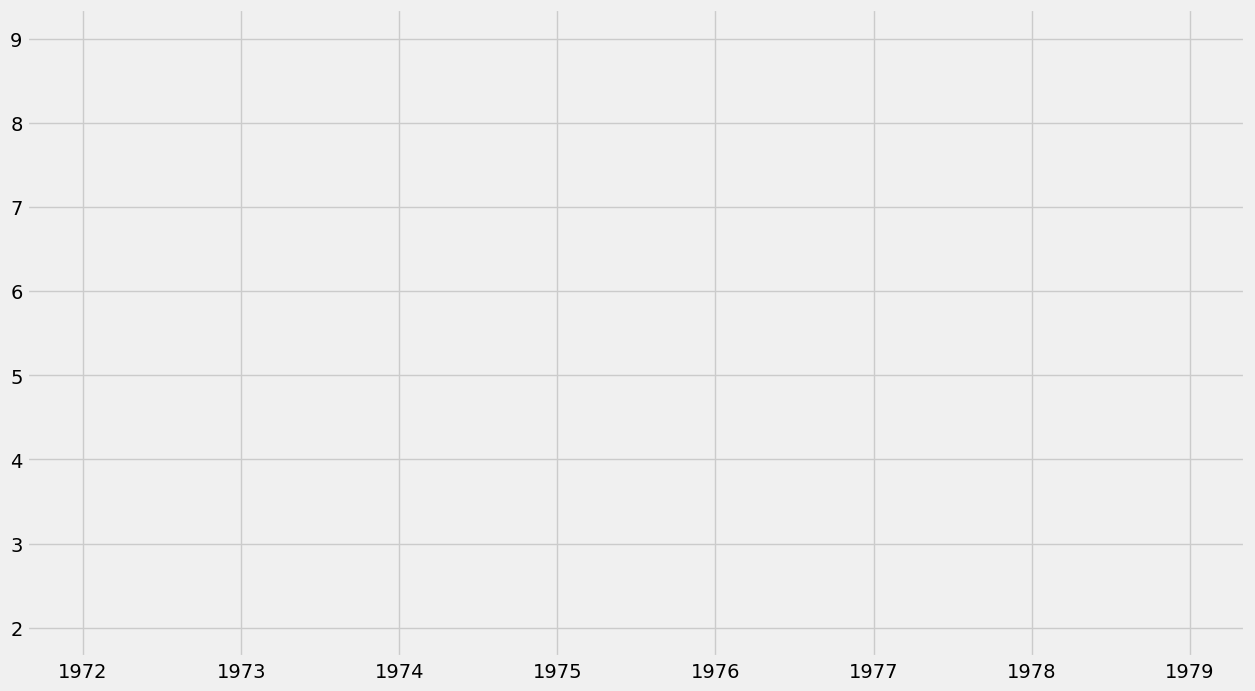

In [20]:
#plt.plot(y_test,color="Lime",linewidth=1.5,label="Test")
#predictions_tfp.plot(legend = True, label="Prediccion")


warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
plt.figure(figsize=(14,8))
#fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
#data['TMIN'].plot(ax=axs[0], title='Serie original')
#datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
#datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

plt.plot(data['TMIN'],color="Lime",linewidth=1.5,label="Serie")
plt.plot(datos_diff_1,color="Red",linewidth=1.5,label="Serie")


In [5]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import *
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.tbats import TBATS
from sktime.utils.plotting import plot_series

In [6]:
#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]
dataset.head(1)   

data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985])]
data.head()

,Year,Month,EVAP,PRECIP,TMAX,TMIN
DATE,,,,,,
1972-01-01,1972,1,3.316129,28.7,32.0,9.0
1972-02-01,1972,2,4.948276,0.0,36.5,6.0
1972-03-01,1972,3,6.635484,0.0,38.0,8.5
1972-04-01,1972,4,9.373333,0.0,43.0,10.0
1972-05-01,1972,5,11.229032,125.4,42.0,14.5


#Data Transformation

In [7]:
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y")
data.head(2)   
data = data.asfreq("MS")
data.index   

DatetimeIndex(['1972-01-01', '1972-02-01', '1972-03-01', '1972-04-01',
               '1972-05-01', '1972-06-01', '1972-07-01', '1972-08-01',
               '1972-09-01', '1972-10-01',
               ...
               '1984-12-01', '1985-01-01', '1985-02-01', '1985-03-01',
               '1985-04-01', '1985-05-01', '1985-06-01', '1985-07-01',
               '1985-08-01', '1985-09-01'],
              dtype='datetime64[ns]', name='DATE', length=165, freq='MS')

In [8]:
data.index.year

Index([1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972, 1972,
       ...
       1984, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985, 1985],
      dtype='int32', name='DATE', length=165)

In [9]:
def metricas(y_true,y_pred,model_name):
    mae_=mean_absolute_error(y_true,y_pred)
    rmse_=mean_squared_error(y_true,y_pred,square_root=True)
    mape_=mean_absolute_percentage_error(y_true,y_pred)
    smape_=mean_absolute_percentage_error(y_true,y_pred,symmetric=True)
    dict_={'MAE':mae_,'RMSE_':rmse_,'MAPE':mape_,'SMAPE':smape_}
    metrica1=pd.DataFrame(dict_,index=[model_name])
    return(metrica1.round(decimals=2))

In [10]:
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['EVAP'],test_size=36)
y_train1, y_test1=temporal_train_test_split(data['EVAP'],test_size=36)
y_train.head(10)

DATE
1972-01-01     3.316129
1972-02-01     4.948276
1972-03-01     6.635484
1972-04-01     9.373333
1972-05-01    11.229032
1972-06-01     9.036667
1972-07-01     6.641935
1972-08-01     5.825806
1972-09-01     4.696667
1972-10-01     4.735484
Freq: MS, Name: EVAP, dtype: float64

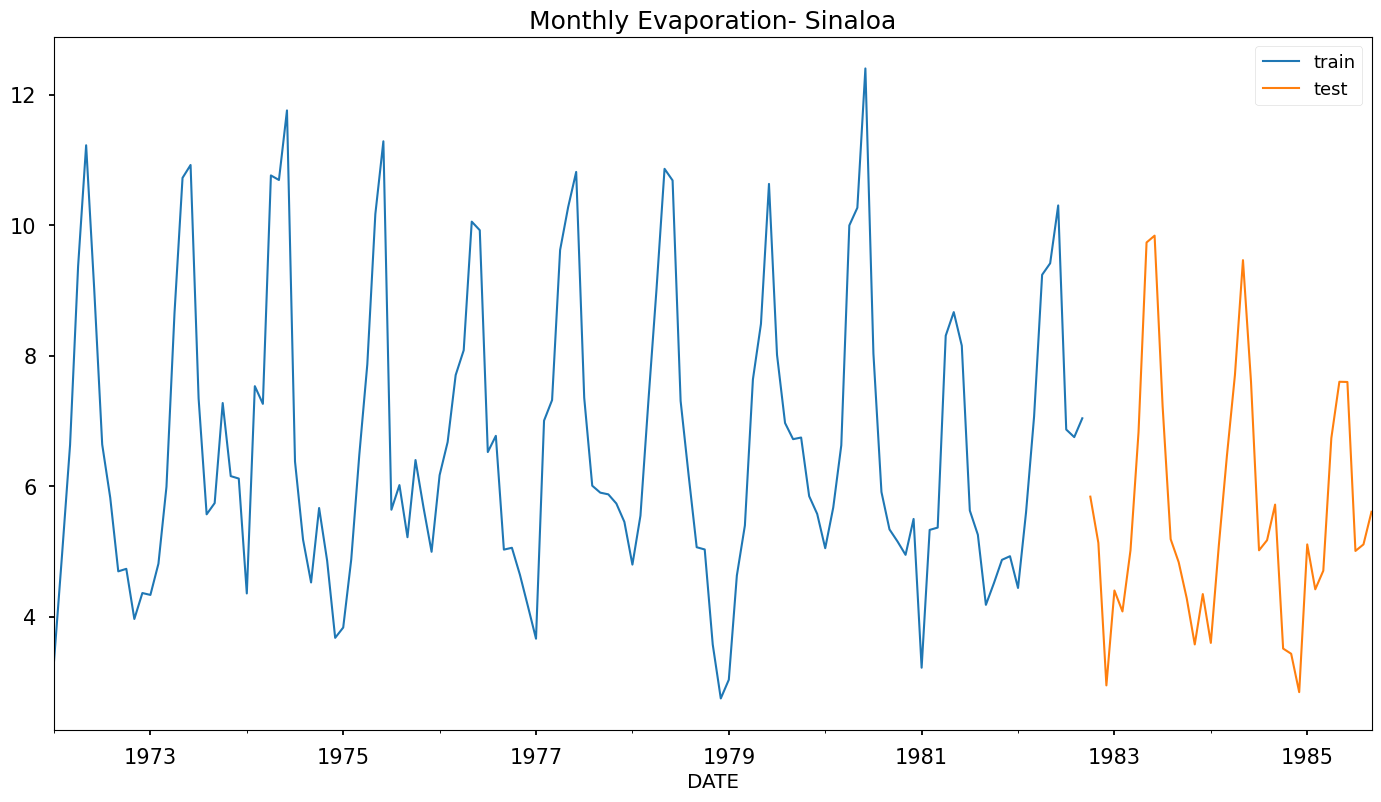

In [11]:
# Gráfico
# ======================================================================================
fig, ax=plt.subplots(figsize=(17, 9))
y_train.plot(ax=ax, label='train',fontsize=15)
y_test.plot(ax=ax, label='test',fontsize=15)
ax.set_title('Monthly Evaporation- Sinaloa',fontsize=18)
ax.legend();

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -0.8822045845191437, p-value: 0.7937762039497861
KPSS Statistic: 0.06031986964851412, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -3.1775997922424035, p-value: 0.02131845910515094
KPSS Statistic: 0.10107363635730278, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -5.360931527957581, p-value: 4.089591733526087e-06
KPSS Statistic: 0.03265499179793751, p-value: 0.1


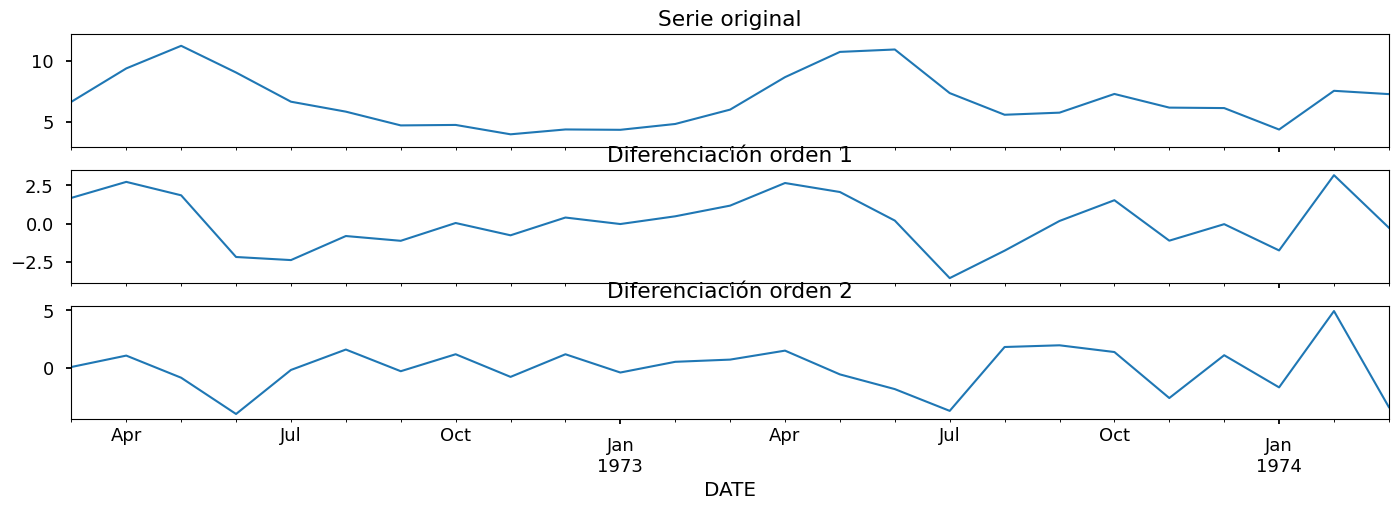

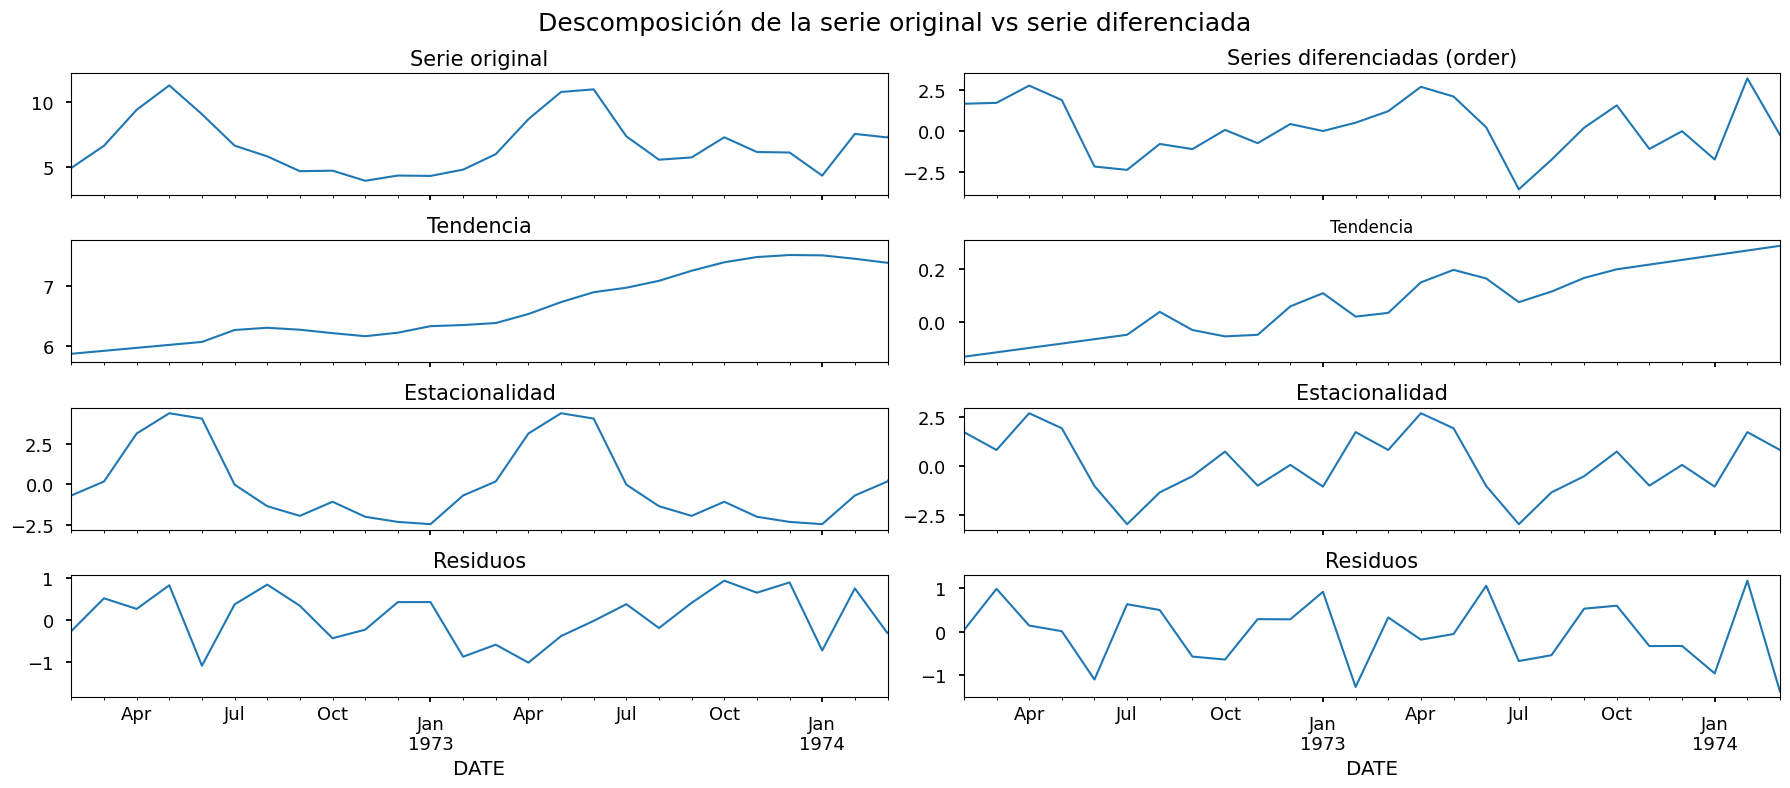

In [27]:
#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]


#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977])]
data = dataset[dataset.Year.isin( [1972,1973,1974])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['EVAP'],test_size=9)

#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['EVAP'])
kpss_result = kpss(data['EVAP'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['EVAP'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['EVAP'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['EVAP'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_evap = seasonal_decompose(data['EVAP'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2_evap = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_evap.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose_evap.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose_evap.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose_evap.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2_evap.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2_evap.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2_evap.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2_evap.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -3.323755571610078, p-value: 0.013849423499501379
KPSS Statistic: 0.08223037316256407, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -2.6885370083965805, p-value: 0.07604295898560046
KPSS Statistic: 0.19653924508023324, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -3.3733626428588495, p-value: 0.011901155713412723
KPSS Statistic: 0.28536577294583554, p-value: 0.1


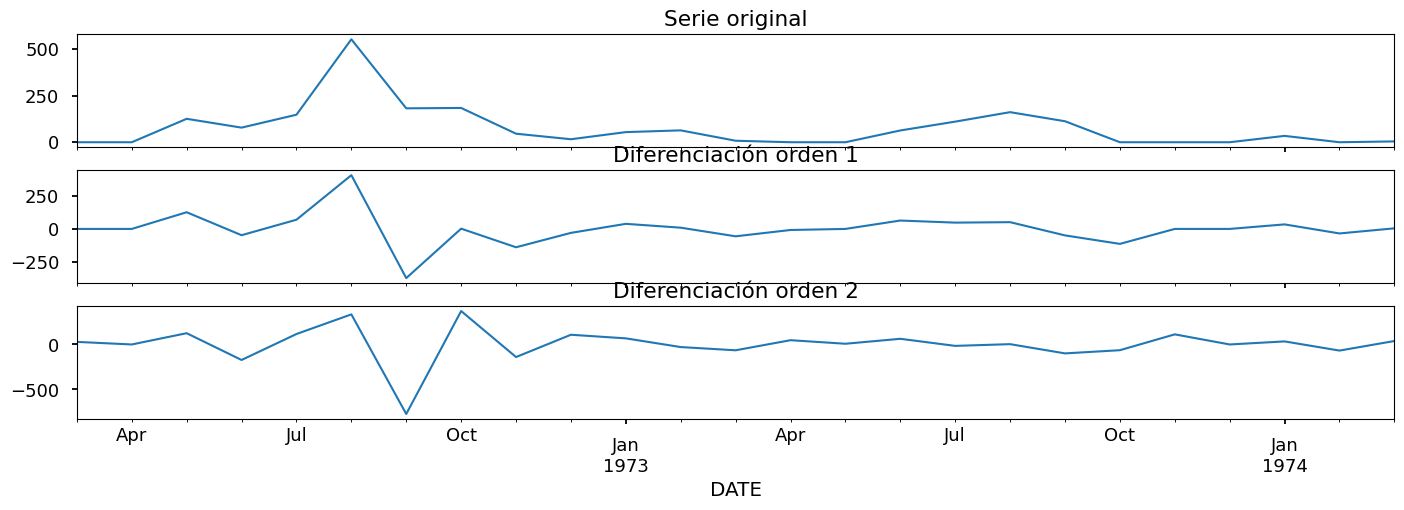

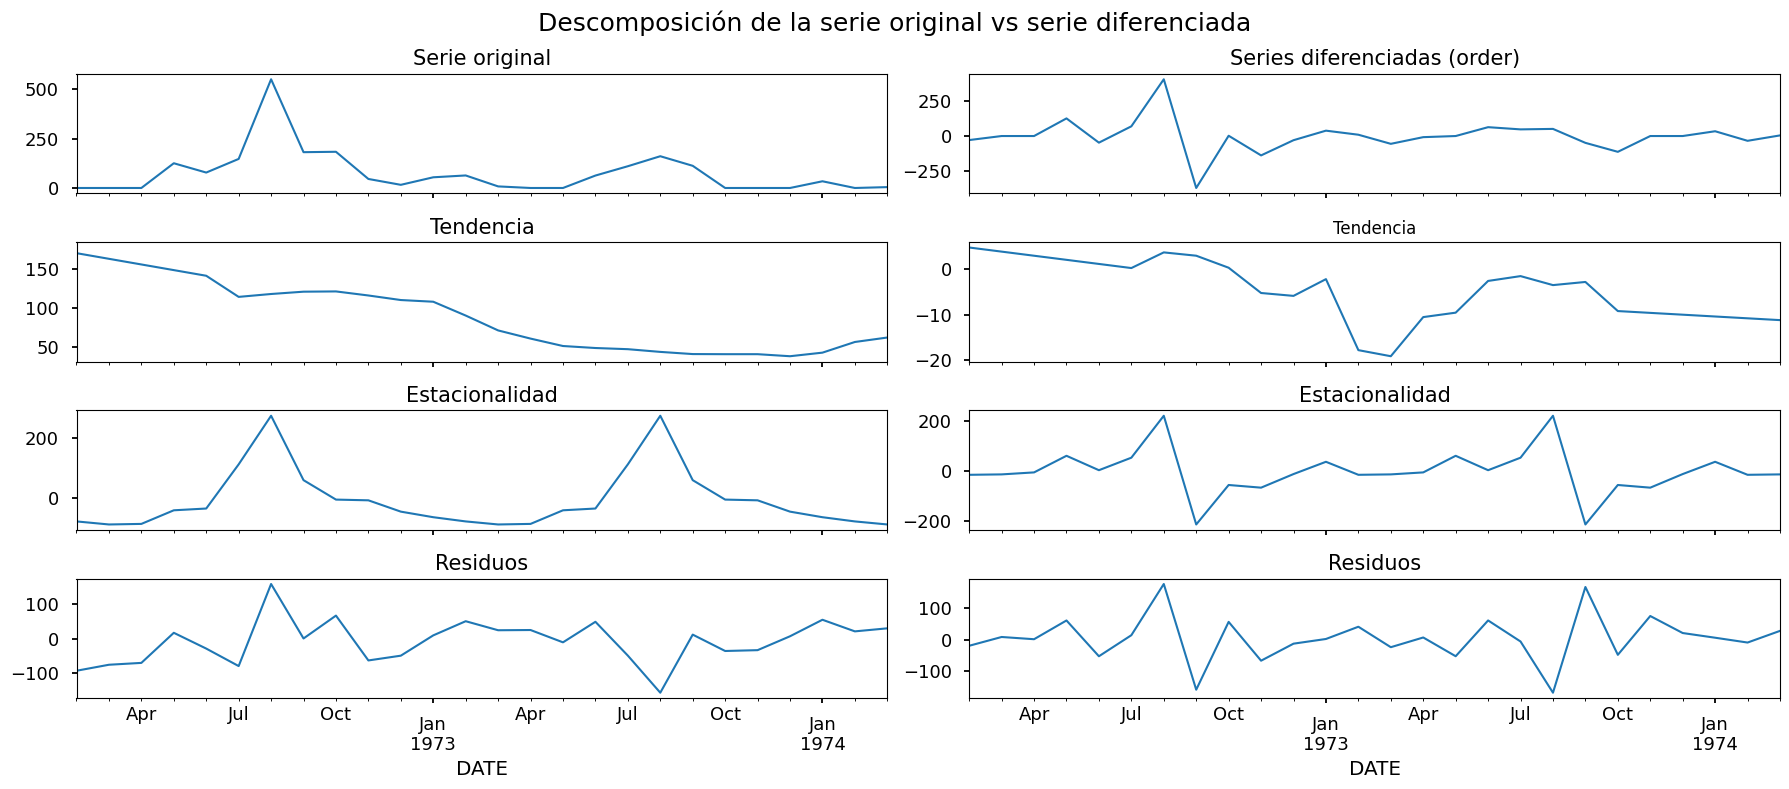

In [32]:

#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
#dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]
#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982])]
data = dataset[dataset.Year.isin( [1972,1973,1974])]

data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['PRECIP'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['PRECIP'])
kpss_result = kpss(data['PRECIP'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['PRECIP'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['PRECIP'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['PRECIP'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_precip = seasonal_decompose(data['PRECIP'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2_precip = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_precip.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose_precip.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose_precip.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose_precip.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2_precip.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2_precip.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2_precip.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2_precip.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();

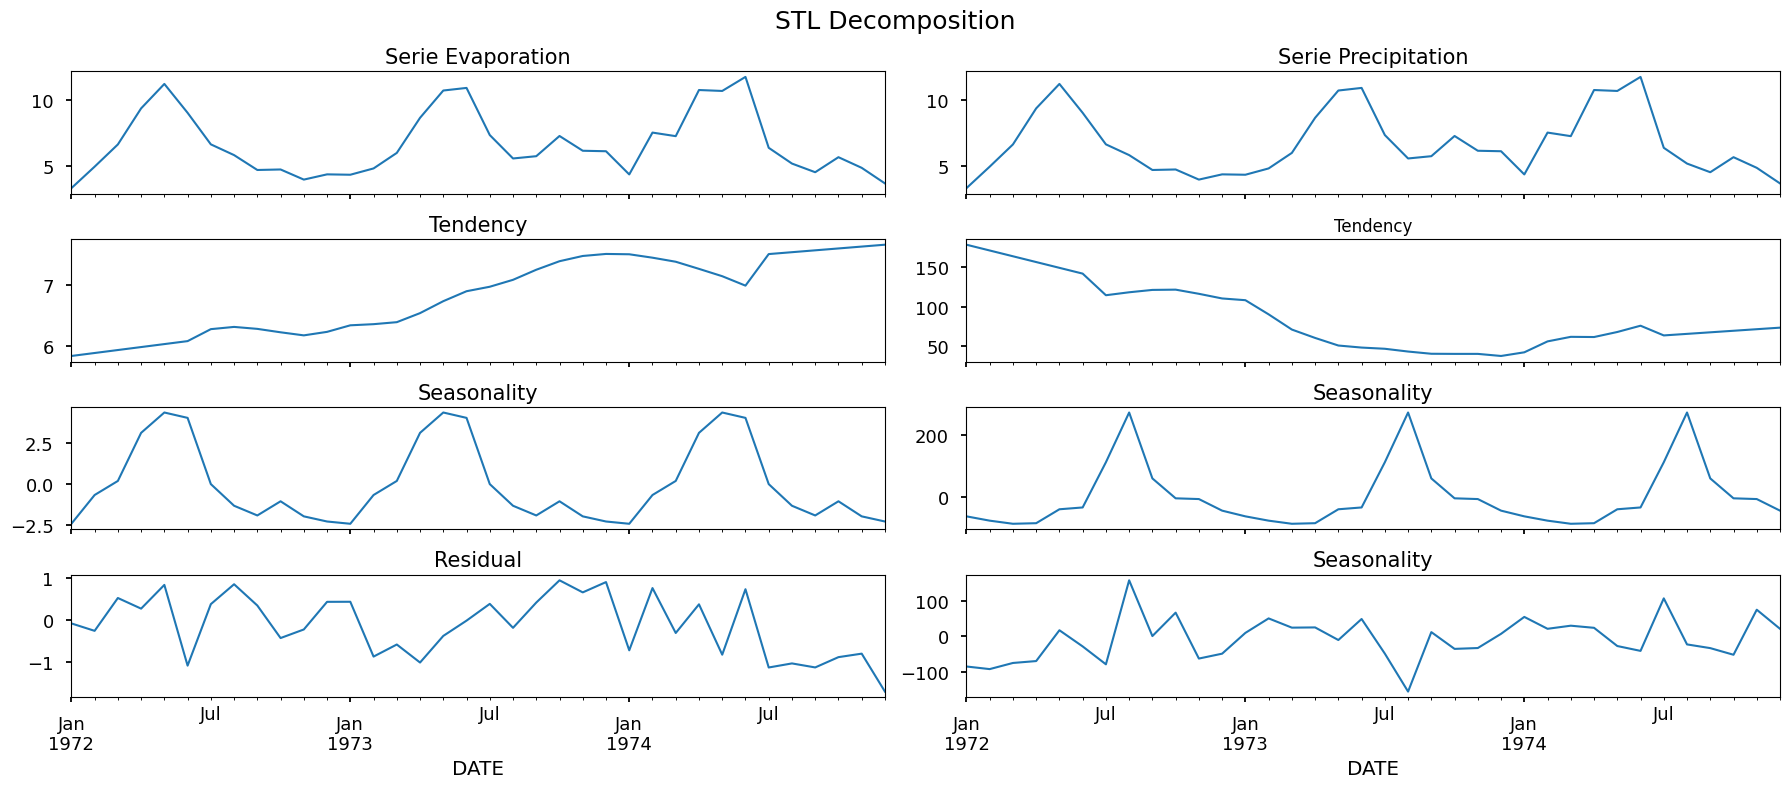

In [11]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose_evap.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie Evaporation', fontsize=15)
res_decompose_evap.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendency', fontsize=15)
res_decompose_evap.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Seasonality', fontsize=15)
res_decompose_evap.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residual', fontsize=15)
res_decompose_evap.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Serie Precipitation', fontsize=15)
res_decompose_precip.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendency', fontsize=12)
res_decompose_precip.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Seasonality', fontsize=15)
res_decompose_precip.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Seasonality', fontsize=15)
fig.suptitle('STL Decomposition', fontsize=18)
fig.tight_layout();

c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -3.5805349453716278, p-value: 0.0061442491037538224
KPSS Statistic: 0.05919859602843801, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -4.499712450941023, p-value: 0.00019687528707183026
KPSS Statistic: 0.22851067165787967, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -7.322714257410785, p-value: 1.1826342672398628e-10
KPSS Statistic: 0.21087056674190122, p-value: 0.1


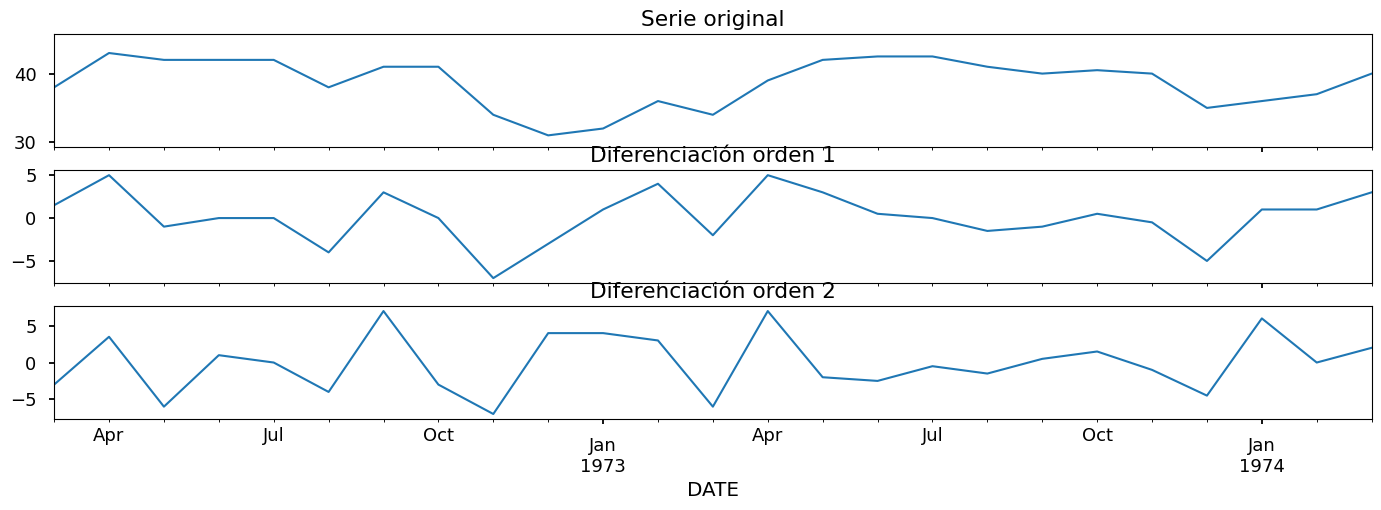

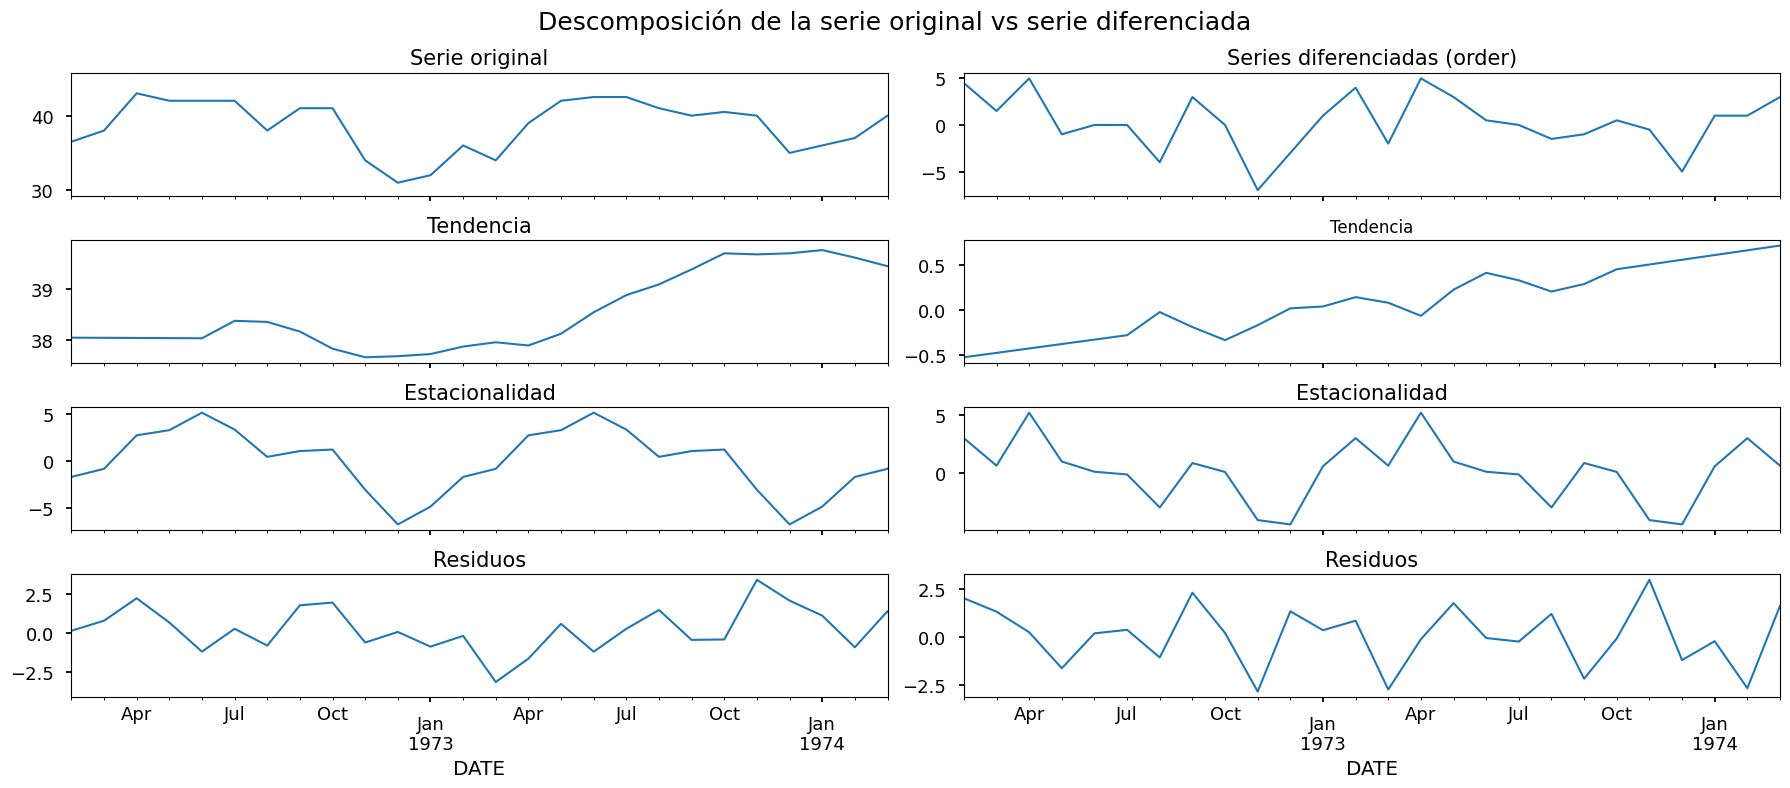

In [33]:
#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984])]
data = dataset[dataset.Year.isin( [1972,1973,1974])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['TMAX'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['TMAX'])
kpss_result = kpss(data['TMAX'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['TMAX'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['TMAX'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
data['TMAX'].plot(ax=axs[0], title='Serie original')
datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose = seasonal_decompose(data['TMAX'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
res_decompose.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=15)
res_decompose.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=15)
res_decompose.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=15)
res_decompose.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=15)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=15)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=12)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=15)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=15)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=18)
fig.tight_layout();


c:\Users\ZM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sktime\forecasting\model_selection\__init__.py:36: DeprecationWarning: WARNING - the old location of temporal_train_test_split in sktime.forecasting.model_selection is deprecated and is scheduled for imminent removal in a MINOR version. Please update any import statements to from sktime.split import temporal_train_test_split.
  warn(


Test estacionariedad serie original
-------------------------------------
ADF Statistic: -4.1420767845391575, p-value: 0.0008245280835650732
KPSS Statistic: 0.04459839617364612, p-value: 0.1

Test estacionariedad para serie diferenciada (order=1)
--------------------------------------------------
ADF Statistic: -4.280350942694073, p-value: 0.0004803327764251716
KPSS Statistic: 0.06575664864930805, p-value: 0.1

Test estacionariedad para serie diferenciada (order=2)
--------------------------------------------------
ADF Statistic: -3.6162981808960333, p-value: 0.005456978025575593
KPSS Statistic: 0.0626037649102194, p-value: 0.1


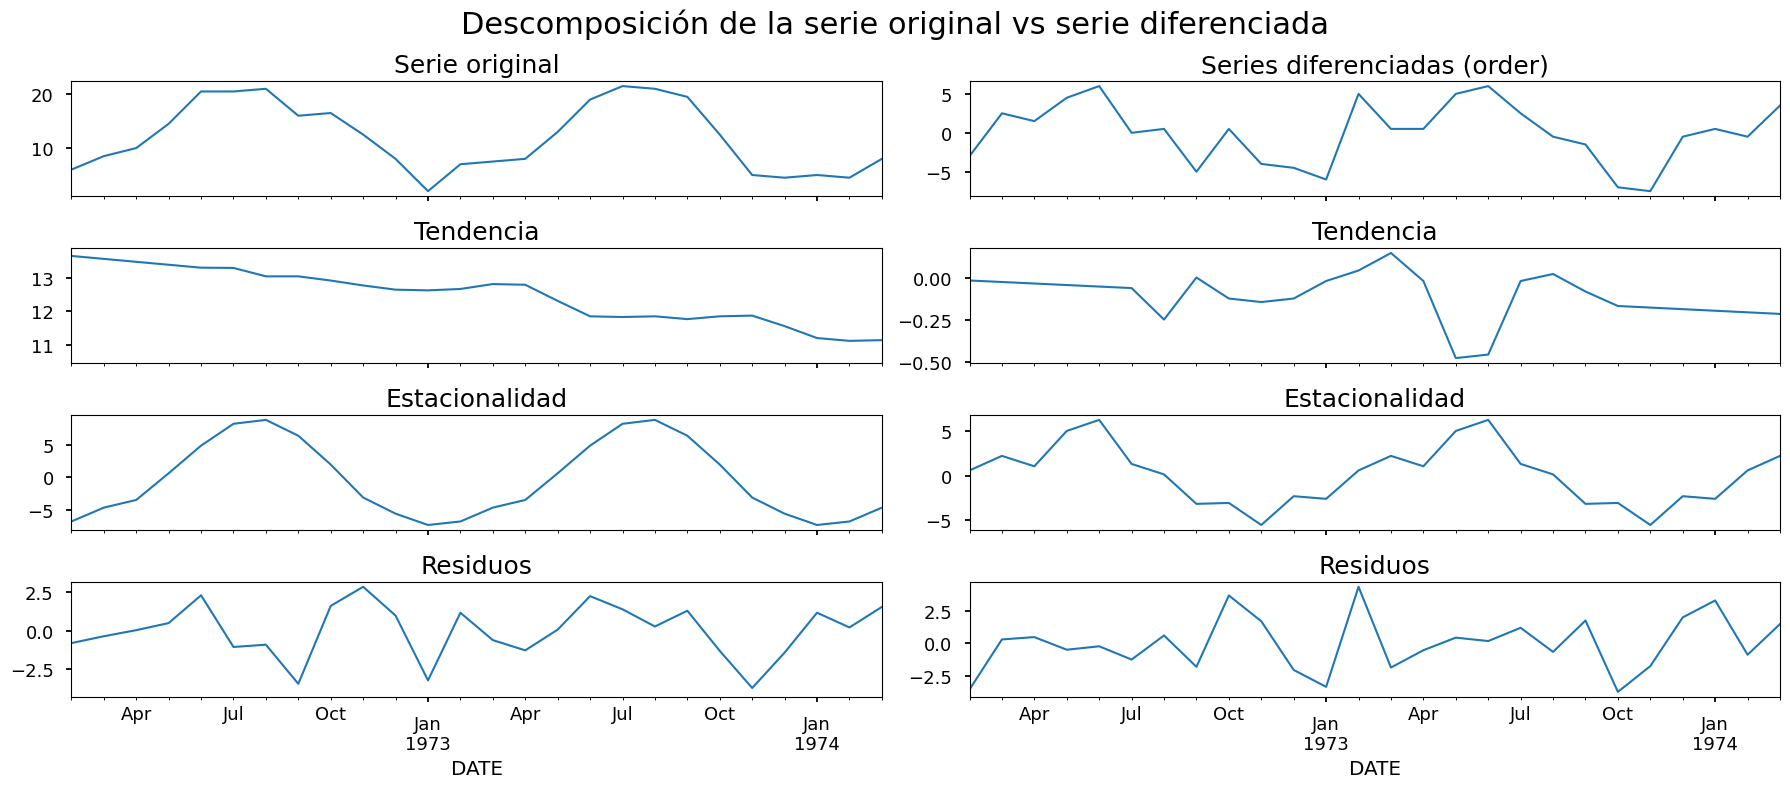

In [34]:
#get the data
data = pd.read_csv("25044_mens.csv",
                   index_col="DATE",
                   parse_dates=True)
dataset = data.loc[:, ["Year","Month","EVAP","PRECIP","TMAX","TMIN"]]

#data = dataset[dataset.Year.isin( [1972,1973,1974,1975,1976,1977,1978,1979])]
data = dataset[dataset.Year.isin( [1972,1973,1974])]
data.index = pd.to_datetime(data.index,
                            format = "%d/%m/%Y") 
data = data.asfreq("MS")
from sktime.forecasting.model_selection import temporal_train_test_split
y_train,y_test=temporal_train_test_split(data['TMIN'],test_size=9)
#Test estacionariedad
# ==============================================================================
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
warnings.filterwarnings("ignore")

datos_diff_1 = y_train.diff().dropna()
datos_diff_2 = datos_diff_1.diff().dropna()

print('Test estacionariedad serie original')
print('-------------------------------------')
adfuller_result = adfuller(data['TMIN'])
kpss_result = kpss(data['TMIN'])
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=1)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_1)
kpss_result = kpss(data['TMIN'].diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

print('\nTest estacionariedad para serie diferenciada (order=2)')
print('--------------------------------------------------')
adfuller_result = adfuller(datos_diff_2)
kpss_result = kpss(data['TMIN'].diff().diff().dropna())
print(f'ADF Statistic: {adfuller_result[0]}, p-value: {adfuller_result[1]}')
print(f'KPSS Statistic: {kpss_result[0]}, p-value: {kpss_result[1]}')

warnings.filterwarnings("default")
# Gráfico series
# ==============================================================================


#plt.figure(figsize=(14,8))
#fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(17, 5), sharex=True)
#data['TMIN'].plot(ax=axs[0], title='Serie original')
#datos_diff_1.plot(ax=axs[1], title='Diferenciación orden 1')
#datos_diff_2.plot(ax=axs[2], title='Diferenciación orden 2');

# Descomposición de la serie original y la serie diferenciada
# ==============================================================================
#library

from statsmodels.tsa.seasonal import seasonal_decompose
res_decompose_tmin = seasonal_decompose(data['TMIN'], model='additive', extrapolate_trend='freq')
res_descompose_diff_2 = seasonal_decompose(datos_diff_1, model='additive', extrapolate_trend='freq')

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(18, 8), sharex=True)
ax = plt.gca() # Obtener una referencia al eje

res_decompose_tmin.observed.plot(ax=axs[0, 0])
axs[0, 0].set_title('Serie original', fontsize=18)
res_decompose_tmin.trend.plot(ax=axs[1, 0])
axs[1, 0].set_title('Tendencia', fontsize=18)
res_decompose_tmin.seasonal.plot(ax=axs[2, 0])
axs[2, 0].set_title('Estacionalidad', fontsize=18)
res_decompose_tmin.resid.plot(ax=axs[3, 0])
axs[3, 0].set_title('Residuos', fontsize=18)
res_descompose_diff_2.observed.plot(ax=axs[0, 1])
axs[0, 1].set_title('Series diferenciadas (order)', fontsize=18)
res_descompose_diff_2.trend.plot(ax=axs[1, 1])
axs[1, 1].set_title('Tendencia', fontsize=18)
res_descompose_diff_2.seasonal.plot(ax=axs[2, 1])
axs[2, 1].set_title('Estacionalidad', fontsize=18)
res_descompose_diff_2.resid.plot(ax=axs[3, 1])
axs[3, 1].set_title('Residuos', fontsize=18)
axs[3, 1].xaxis.offsetText.set_fontsize(22)
fig.suptitle('Descomposición de la serie original vs serie diferenciada', fontsize=22)
fig.tight_layout();


C:\Users\ZM\AppData\Local\Temp\ipykernel_8908\1103191967.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Evaporacion anual en el estado de Sinaloa",bbox_to_anchor=(1, 1.2),fontsize='medium')
C:\Users\ZM\AppData\Local\Temp\ipykernel_8908\1103191967.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(x="Year", y="EVAP",
C:\Users\ZM\AppData\Local\Temp\ipykernel_8908\1103191967.py:7: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax=sns.boxplot(x="Year", y="EVAP",


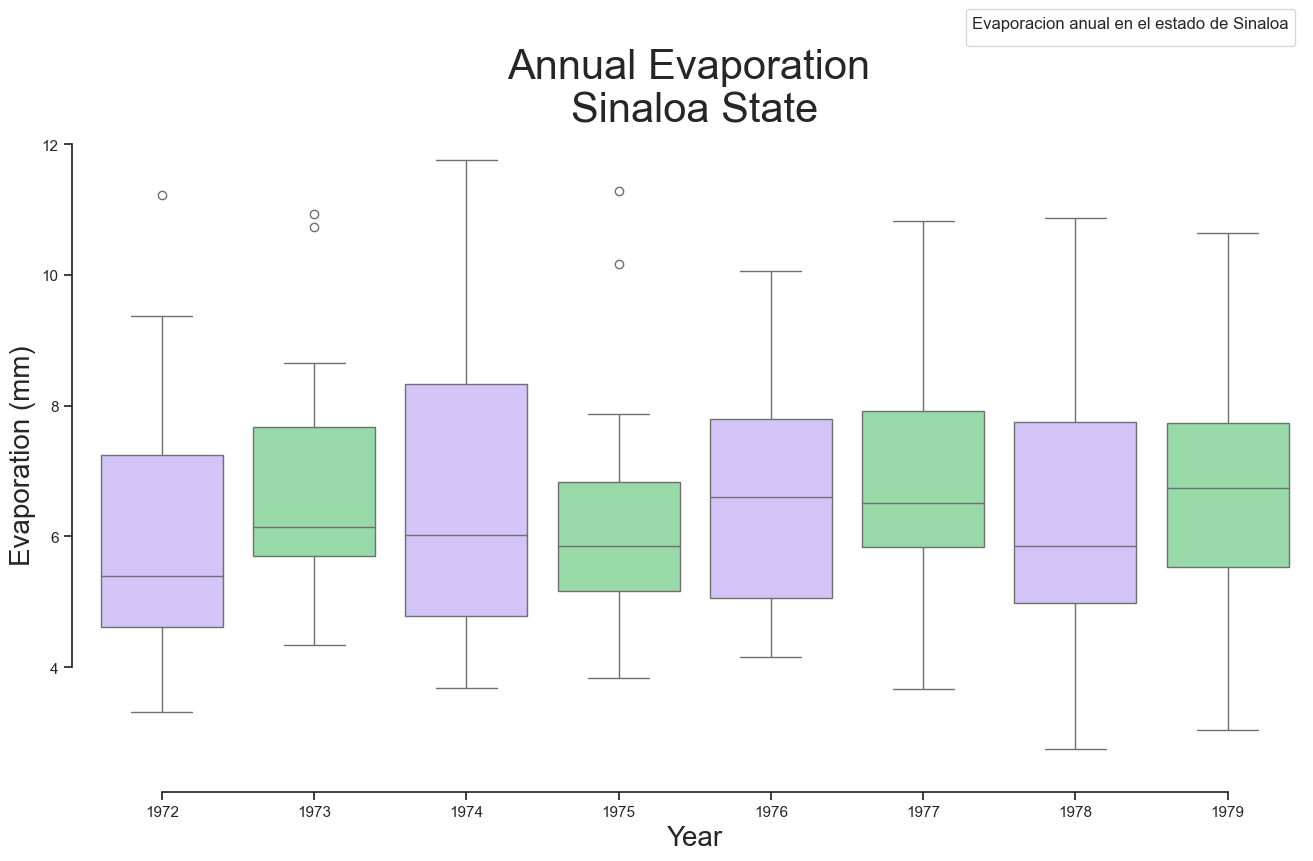

In [70]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
plt.figure(figsize=(14,8))

# Draw a nested boxplot to show bills by day and time
plt.legend(title="Evaporacion anual en el estado de Sinaloa",bbox_to_anchor=(1, 1.2),fontsize='medium')
ax=sns.boxplot(x="Year", y="EVAP",
            palette=["m", "g"],
            data=data)
ax.set_title('Annual Evaporation \nSinaloa State',fontsize=30)
ax.set_xlabel("Year",fontsize=20)
ax.set_ylabel("Evaporation (mm)",fontsize=20)
#plt.legend(labels=["Legend_Day1", "Legend_Day2"], title="Title_Legend")
sns.despine(offset=10, trim=True)


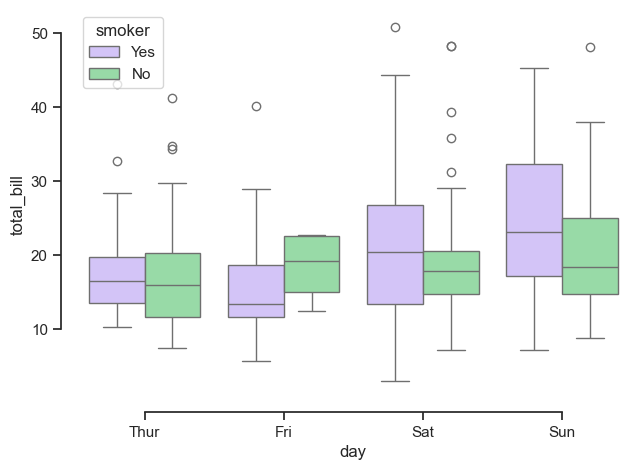

In [22]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=tips)
sns.despine(offset=10, trim=True)

#XGBoost preparation

In [16]:
#isolate X and Y
y_train = training_set.y
y_test = test_set.y
X_train = training_set.iloc[:, 2:]
X_test = test_set.iloc[:, 2:]

In [19]:
#create XGBoost Matrices
Train = xgb.DMatrix(data = X_train, label = y_train)
Test = xgb.DMatrix(data = X_test, label = y_test)

#XGBoost

In [21]:
#Set the parameters
parameters = {'learning_rate': 0.1,
              'max_depth': 3,
              'colsample_bytree': 1,
              'subsample': 1,
              'min_child_weight': 1,
              'gamma': 1,
              'random_state': 1502,
              'eval_metric': "rmse",
              'objective': "reg:squarederror"}

In [22]:
#XGBoost Model
model = xgb.train(params = parameters,
                  dtrain = Train,
                  num_boost_round = 100,
                  evals = [(Test, "y")],
                  verbose_eval = 15)

[0]	y-rmse:3891.59
[15]	y-rmse:1607.49
[30]	y-rmse:1368.37
[45]	y-rmse:1290.71
[60]	y-rmse:1252.2
[75]	y-rmse:1212.15
[90]	y-rmse:1199.75
[99]	y-rmse:1179.15


#Forecasting and Visualization

In [26]:
#Forecasting
predictions_xgb = pd.Series(model.predict(Test), name = "XGBoost")
predictions_xgb.index = test_set.ds
predictions_xgb[:2]

ds
2012-12-01    4020.162598
2012-12-02    3019.301025
Name: XGBoost, dtype: float32

In [27]:
#set up index
training_set.index = training_set.ds
test_set.index = test_set.ds

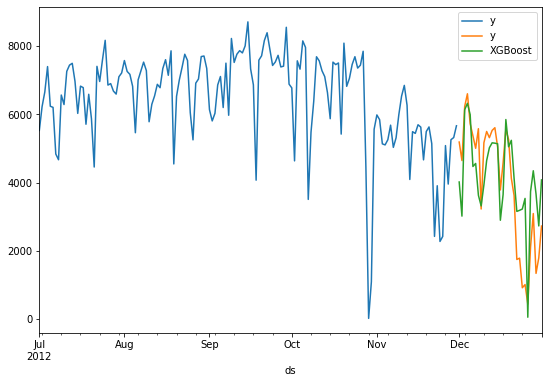

In [31]:
#Viz
training_set.y['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set.y.plot(legend = True)
predictions_xgb.plot(legend = True)

#Model assessment

In [32]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_xgb),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_xgb)), 0))

954.0
1179.0


In [33]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_xgb)

45.99199599293936

#export forecasts

In [34]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble

/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python/0. Ensemble


In [35]:
predictions_xgb.to_csv('predictions_xgb.csv', index = True)